# Resolution Enhancement: 2 

Continuing from [preprocessing_1_smoothing_sharpening_1](./preprocesing_1_smoothing_sharpening_1.ipynb), here we are attempting to resolve all peak shoulders as peaks through derivative subtraction prior to further resolution enhancement through power law method (see previous notebook).

The secondary task will be to produce a scikit learn column transformer to apply the process. This will require defining transfromer classes for:

- first derivative addition
- second derivative subtraction
- power law method
- savgol filter



## Defining Transformer classes

First set up the environment: 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
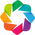

ImportError: cannot import name 'DataSets' from 'hplc_py.pipeline.preprocess_dashboard' (/Users/jonathan/hplc-py/hplc_py/pipeline/preprocess_dashboard.py)

In [1]:
from dataclasses import dataclass
from findiff import FinDiff
from hplc_py.definitions import PRECISION
from hplc_py.pipeline.preprocess_dashboard import DataSets, PreProcesser
from pandera.typing.polars import DataFrame, LazyFrame
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

import holoviews as hv
import hvplot
import numpy as np
import pandera as pa
import panel as pn
import polars as pl

%reload_ext autoreload
%autoreload 2

pl.Config.set_fmt_float(fmt="full")
pl.Config.set_tbl_rows(10)

hv.renderer("bokeh").theme = "dark_minimal"

dsets = DataSets()
ringland = dsets.ringland.fetch().with_columns(
    pl.col("time").round(9), pl.col("signal").round(9)
)
ringland.head()

### Subtraction of Weighted Second Derivative

We will recall from the previous notebook that the subtraction of the weighted second derivative is defined as: $$R_j=Y_j-k_2Y"$$

where $R_j$ is the enhanced signal, $Y_j$ is the original signal, $Y"$ is the second derivative of $Y_j$, $k_2$ is the seond derivative weighting factor.

Thus the transformer needs to calculate the second derivative and subtract it from the input, returning R.

In [ ]:
data = ringland.select(
    pl.col("time").round(PRECISION), pl.col("signal").round(PRECISION)
)
data

time,signal
f64,f64
0.005833333,0.001952052
0.0125,0.001825392
0.019166667,0.002004206
0.025833333,0.002861023
0.0325,0.003963709
…,…
26.9725,1.733087003
26.979166667,1.732110977
26.985833333,1.731097698


#### First Finite Difference

We will use the FinDiff package for calculating our finite differences - it is better to use third-party packages (which are still supported) as they cover edge cases, testing, validation etc. While the docs dont explicitely state it, it is clear that they use the central finite difference for intermediate values, the foreward for the first value, and back for the last. See: [FinDiff Theory](https://findiff.readthedocs.io/en/latest/source/theory.html)

In [ ]:
dx = data.select(pl.col("time").diff().mean()).item()
dx

0.006666666666831317

In [ ]:
d1 = FinDiff(0, dx, 1)

data = data.pipe(
    lambda df: df
    .with_columns(
        pl.Series(name='d1', values=d1(
            df.select("signal").to_series().to_numpy()
        )).round(PRECISION)
    )
)  # fmt: skip
display(data)

time,signal,d1
f64,f64,f64
0.005833333,0.001952052,-0.04190955
0.0125,0.001825392,0.00391155
0.019166667,0.002004206,0.077672325
0.025833333,0.002861023,0.146962725
0.0325,0.003963709,0.1620501
…,…,…
26.9725,1.733087003,-0.13634565
26.979166667,1.732110977,-0.149197875
26.985833333,1.731097698,-0.146962725


In [ ]:
d1_viz = (
    data.with_columns(pl.col("d1").mul(0.1))
    .plot(x="time", y=["signal", "d1"], alpha=[1, 0.6], line_dash=["solid", "dotdash"])
    .opts(
        height=750, width=1000, title="signal and first finite difference", xlim=(0, 5)
    )
)
display(d1_viz)

:NdOverlay   [Variable]
   :Curve   [time]   (value)

##### As Transformer

Now define it as a transformer. I guess we can just have one called FiniteDiff which accepts parameters for different orders, and addition or subtraction.

In [ ]:
from sklearn.utils.validation import check_array, check_is_fitted


class FiniteDiffAdder(BaseEstimator, TransformerMixin):
    """
    Use to add or subtract finite differences from X. combine multiple steps,
    as stages in the pipeline, for example subtract the second derivative, add the 4th.
    """

    def __init__(self, order: int = 1, dx: float = 1, k: float = 1, sign: str = "-"):
        """
        order: the order of the finite difference, 1st, 2nd, 3rd, etc.
        sign: ["+", "-"], whether to add or subtract the finite difference from X
        k: second derivative weighting term
        """
        self.order = order
        self.dx = dx
        self.sign = sign
        self.k = k

        self.findiff_operator = FinDiff(0, dx, order)

    def fit(self, X, y=None):
        if self.sign not in ["+", "-"]:
            raise ValueError("please input '+' or '-'")

        self.n_features_ = X.shape[1]

        self.is_fitted_ = True

        self.feature_names_in_ = X.columns

        return self

    def transform(self, X, y=None):
        """
        logic here
        """

        check_is_fitted(self, "n_features_")

        if X.shape[1] != self.n_features_:
            raise ValueError(
                "shape of input is different from what was seen" "in `fit`"
            )

        self.X = X
        self.feature_names_in_ = X.columns

        self.diff_ = self.findiff_operator(X)

        if self.sign == "+":
            self.X_t = np.add(self.X, np.multiply(self.k, self.diff_))
        elif self.sign == "-":
            self.X_t = np.subtract(self.X, np.multiply(self.k, self.diff_))

        return self.X_t

    def get_feature_names_out(self):
        """
        dummy method to enable instantiation of `set_output` API, see: <https://stackoverflow.com/a/75036830/21058408>
        """
        return self.feature_names_in_

Now define a `ColumnTransformer` to apply to the column. As `ColumnTransformer` can only apply one transform per column, you need to nest pipelines and transformers.

In [ ]:
# define input data

input_data = data.select("signal")

In [ ]:
# test transformer

input_data.pipe(
    FiniteDiffAdder().set_output(transform="polars").fit_transform
).with_columns(pl.col("signal").round(PRECISION))

signal
f64
0.002231449
0.001799315
0.001486391
0.001881271
0.002883375
…
1.733995974
1.73310563
1.73207745


In [ ]:
# define pipeline

from sklearn.pipeline import Pipeline

pipeline_steps = [
    ("first_diff_sym", FiniteDiffAdder()),
]

pipe = Pipeline(steps=pipeline_steps, verbose=True)
pipe

Pipeline(steps=[('first_diff_sym', FiniteDiffAdder())], verbose=True)

In [ ]:
# define column transformer

ct_transformers = [
    ("sr_pipe", pipe, ["signal"]),
]

ct = ColumnTransformer(
    transformers=ct_transformers,
    remainder="passthrough",
    verbose_feature_names_out=True,
).set_output(transform="polars")

ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('sr_pipe',
                                 Pipeline(steps=[('first_diff_sym',
                                                  FiniteDiffAdder())],
                                          verbose=True),
                                 ['signal'])])

In [ ]:
input_data_ct = data.select("time", "signal")
input_data_ct

time,signal
f64,f64
0.005833333,0.001952052
0.0125,0.001825392
0.019166667,0.002004206
0.025833333,0.002861023
0.0325,0.003963709
…,…
26.9725,1.733087003
26.979166667,1.732110977
26.985833333,1.731097698


In [ ]:
input_data_ct.pipe(ct.fit_transform)

[Pipeline] .... (step 1 of 1) Processing first_diff_sym, total=   0.0s


sr_pipe__signal,remainder__time
f64,f64
0.002231449,0.005833333
0.0017993149999999997,0.0125
0.0014863905000000001,0.019166667
0.0018812714999999999,0.025833333
0.002883375,0.0325
…,…
1.733995974,26.9725
1.7331056295000002,26.979166667
1.7320774495,26.985833333


Now I need a savgol filter.

[scipy savgol filter docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html)

In [ ]:
from scipy import signal

signal.savgol_filter

<function scipy.signal._savitzky_golay.savgol_filter(x, window_length, polyorder, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)>

In [ ]:
from sklearn.utils.validation import check_array, check_is_fitted


class SavgolFilter(BaseEstimator, TransformerMixin):
    """
    Use to smooth a signal
    """

    def __init__(
        self,
        window_length: int,
        polyorder: int,
        deriv: int = 0,
        delta: float = 1.0,
        mode: str = "interp",
    ):
        """
        order: the order of the finite difference, 1st, 2nd, 3rd, etc.
        sign: ["+", "-"], whether to add or subtract the finite difference from X
        k: second derivative weighting term
        """
        self.window_length = window_length
        self.polyorder = polyorder
        self.deriv = deriv
        self.delta = delta
        self.mode = mode

    def fit(self, X, y=None):
        self.n_features_ = X.shape[1]

        self.is_fitted_ = True

        self.feature_names_in_ = X.columns

        return self

    def transform(self, X, y=None):
        """
        logic here
        """

        check_is_fitted(self, "n_features_")

        if X.shape[1] != self.n_features_:
            raise ValueError(
                "shape of input is different from what was seen" "in `fit`"
            )

        self.X = X
        self.feature_names_in_ = X.columns

        input_x = self.X.to_series(0).to_numpy().ravel()

        self.X_t = signal.savgol_filter(
            x=input_x,
            window_length=self.window_length,
            polyorder=self.polyorder,
            deriv=self.deriv,
            delta=self.delta,
            mode=self.mode,
        )

        return self.X_t

    def get_feature_names_out(self):
        """
        dummy method to enable instantiation of `set_output` API, see: <https://stackoverflow.com/a/75036830/21058408>
        """
        return self.feature_names_in_

In [ ]:
# test the savgol filter
savgol_tformer = SavgolFilter(window_length=500, polyorder=1)
savgol_tformer.set_output(transform="polars")
smoothed_signal = input_data.pipe(savgol_tformer.fit_transform)
smoothed_signal

signal
f64
8.582627598925962
8.648033411701961
8.713439224477963
8.778845037253962
8.844250850029962
…
1.744857139617627
1.7448100282449328
1.7447629168722387


In [ ]:
smoothed_signal.plot(y="signal", grid=True)

:Curve   [index]   (signal)

Looks good.

Now for power law.

And power law:

In [ ]:
class PowerLaw(BaseEstimator, TransformerMixin):
    """
    Use to smooth a signal
    """

    def __init__(
        self,
        order: int = 2,
    ):
        """
        order: the order of the finite difference, 1st, 2nd, 3rd, etc.
        sign: ["+", "-"], whether to add or subtract the finite difference from X
        k: second derivative weighting term
        """
        self.order = order

    def fit(self, X, y=None):
        self.n_features_ = X.shape[1]

        self.is_fitted_ = True

        self.feature_names_in_ = X.columns

        return self

    def transform(self, X, y=None):
        """
        logic here
        """

        check_is_fitted(self, "n_features_")

        if X.shape[1] != self.n_features_:
            raise ValueError(
                "shape of input is different from what was seen" "in `fit`"
            )

        self.X = X
        self.feature_names_in_ = X.columns

        input_x = self.X.to_series(0).to_numpy().ravel()

        self.X_t = np.power(self.X, self.order)

        return self.X_t

    def get_feature_names_out(self):
        """
        dummy method to enable instantiation of `set_output` API, see: <https://stackoverflow.com/a/75036830/21058408>
        """
        return self.feature_names_in_

And test power law

In [ ]:
powlaw = PowerLaw(order=1.5)
powlaw.set_output(transform="polars")
powlaw_out = powlaw.fit_transform(X=input_data)
powlaw_out.with_row_index("idx").plot(x="idx", y="signal", grid=True).opts(
    height=750, width=1250
)

/var/folders/mh/cknmc22s2zv5m4l777wwz1b00000gn/T/ipykernel_2226/1243495907.py:43: RuntimeWarning: invalid value encountered in power
  self.X_t = np.power(self.X, self.order)


:Curve   [idx]   (signal)

Can use any parameter input > 1 real numbers - 1, 1.1, 1.5, etc. Even `order` = 2 is too much, losing most peaks. Note: receiving: "RuntimeWarning: invalid value encountered in power", but it still appears to compute.

### Joining it All Together

Form a pipeline, start playing with the steps.

In [ ]:
from hplc_py.pipeline.pipeline_dev_notebooks.transformers import (
    FiniteDiffAdder,
    PowerLaw,
    SavgolFilter,
    SNIPBCorr,
    Rounder,
)

steps = [
    ("bcorr", SNIPBCorr(n_iter=39)),
    ("2nd_order_sub", FiniteDiffAdder(order=2, k=0.0006)),
    (
        "rounder",
        Rounder(),
    ),
]

pipe = Pipeline(steps=steps).set_output(transform="polars")
ringland = ringland.with_columns(
    input_data.select(pl.col("signal"))
    .pipe(pipe.fit_transform)
    .select(pl.col("signal").name.suffix("_proc"))
)
ringland

Performing baseline correction: 100%|██████████| 39/39 [00:00<00:00, 759.52it/s]


idx,detection,color,varietal,id,code_wine,time,signal,signal_proc
i64,str,str,str,str,str,f64,f64,f64
0,"""raw""","""red""","""shiraz""","""7b085f32-4d69-…","""a0301_2021 chr…",0.005833333,0.001952052,0
1,"""raw""","""red""","""shiraz""","""7b085f32-4d69-…","""a0301_2021 chr…",0.0125,0.001825392,0
2,"""raw""","""red""","""shiraz""","""7b085f32-4d69-…","""a0301_2021 chr…",0.019166667,0.002004206,0
3,"""raw""","""red""","""shiraz""","""7b085f32-4d69-…","""a0301_2021 chr…",0.025833333,0.002861023,-0.000000014
4,"""raw""","""red""","""shiraz""","""7b085f32-4d69-…","""a0301_2021 chr…",0.0325,0.003963709,0.000022095
…,…,…,…,…,…,…,…,…
4045,"""raw""","""red""","""shiraz""","""7b085f32-4d69-…","""a0301_2021 chr…",26.9725,1.733087003,0.000444144
4046,"""raw""","""red""","""shiraz""","""7b085f32-4d69-…","""a0301_2021 chr…",26.979166667,1.732110977,0.000295747
4047,"""raw""","""red""","""shiraz""","""7b085f32-4d69-…","""a0301_2021 chr…",26.985833333,1.731097698,0.000093795


## Taking the Logarithm of a Chromatogram

I want to find methods of transformation to reduce the scale of y. The primary reason is to fit all the peaks on the same y scale, but also because the optimization algorithm will benefit, having a smaller feature space to search.

Taking the logarithm may be one method of reducing the scale of y.

In [ ]:
ringland.with_columns(pl.col("signal").log1p().name.suffix("_log")).plot(
    y=["signal", "signal_log"]
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

Nvm, dont do that. All resolution is lost. Perhaps a different base could be selected. A question for a later time.

## Signal Map

I require a top level signal mapping API thats capable of presenting all of the information generated by the peak mapping and window mapping functions, and their respective visualisations. They have been combined into SignalMap.

In [ ]:
# %debug
# 1. map peaks
from hplc_py.map_signal import map_signal

signal_mapper = map_signal.SignalMapper(find_peaks_kwargs={"prominence": 0.00001})

X_windowed = ringland.select(
    pl.col("idx"), pl.col("signal_proc").round(5).alias("X")
).pipe(signal_mapper.fit_transform)
X_windowed

/Users/jonathan/hplc-py/hplc_py/map_signal/map_windows/map_windows.py:898: UserWarning: interpeak window of length one detected:
shape: (1, 4)
┌──────┬───────┬────────────┬─────────────┐
│ left ┆ right ┆ w_idx_left ┆ w_idx_right │
│ ---  ┆ ---   ┆ ---        ┆ ---         │
│ i64  ┆ i64   ┆ i64        ┆ i64         │
╞══════╪═══════╪════════════╪═════════════╡
│ 1916 ┆ 1917  ┆ 2          ┆ 3           │
└──────┴───────┴────────────┴─────────────┘
left: the interpeak window start idx, right: interpeak window end idx, w_idx_left: the peak window idx on the left, w_idx_right: the peak window idx on the right.

this is a development warning as I do not expect this scenario to occur if a sufficiently low level of precision is used. It is happening (i think) because the peak measuring algorithms are very sensitive to precision.

Do with it what you will, but the result is neighbouring peak windows with no intermediate interpeak window

  warnings.warn(warning_str)


w_type,w_idx,idx,X
str,i64,i64,f64
"""interpeak""",0,0,0
"""interpeak""",0,1,0
"""interpeak""",0,2,0
"""peak""",0,3,-0
"""peak""",0,4,0.00002
…,…,…,…
"""peak""",12,4045,0.00044
"""peak""",12,4046,0.0003
"""peak""",12,4047,0.00009


In [ ]:
signal_map_viz = signal_mapper.signal_mapping_.viz_mode()
signal_map_viz

In [ ]:
# signal_map_viz.draw_signal().draw_maxima().draw_interpeak_windows().label_peak_windows().plot()
signal_map_viz.draw_signal().draw_interpeak_windows().label_peak_windows().plot().opts(
    height=500, width=1000
)

:Overlay
   .Curve.X   :Curve   [idx]   (X)
   .VSpans.I  :VSpans   [x0,x1]
   .VSpans.II :VSpans   [x0,x1]
   .Labels.I  :Labels   [x,y]   (w_idx)

## Handling Floating Point Errors

So we have a functioning 'SignalMapper' object which combines the actions of peak_map and window_map. we still need to add rounding to all transformers. Doing this will require passing information to the transformers. Preferably, once. It is not a variable to be modified often.

2024-04-17 13:38:31

It is done. A precision mixin class has been defined and added to my custom functions where appropriate. A rounder sklearn transformer has been defined for Pipeline integration.

## Conclusion

In this chapter I defined a number of custom transformer classes and explored the ColumnTransformer and Pipeline frameworks, defined a user facing Signal Map api, redefined the visualisation API, and integrated precision rounding into all calculations.

The next chapter: [Resolution Enhancement: 3](preprocessing_1_smoothing_sharpening_3.ipynb) will look at applying all of the developed techniques to produce a cleaned signal ready for deconvolution.